In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn as sl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [40]:
#Read the data set using pandas
Boombike = pd.read_csv('Day.csv')

In [41]:
Boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [42]:
#lets drop instant and dteday as these two are not using for model building
Boombike = Boombike.drop(['instant','dteday'], axis = 1)

In [43]:
Boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [44]:
#check for nul values in data set
Boombike.isnull().sum()
#there are no null values present in data set

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [45]:
#For brtter reading purpose lets remap the values in season
Boombike['season'] = Boombike.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [46]:
Boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [47]:
# Do the same for mnth column as well
Boombike['mnth'] = Boombike.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [48]:
Boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [49]:
#Do same for weekday column as well
Boombike['weekday'] = Boombike.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wedensday',4:'Thursday',5:'Friday',6:'Saturday'})

In [50]:
Boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,January,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,January,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,January,0,Wedensday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [51]:
#Do same for weathersit column as well
Boombike['weathersit'] = Boombike['weathersit'].map({1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

In [52]:
Boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,January,0,Wedensday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
Boombike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


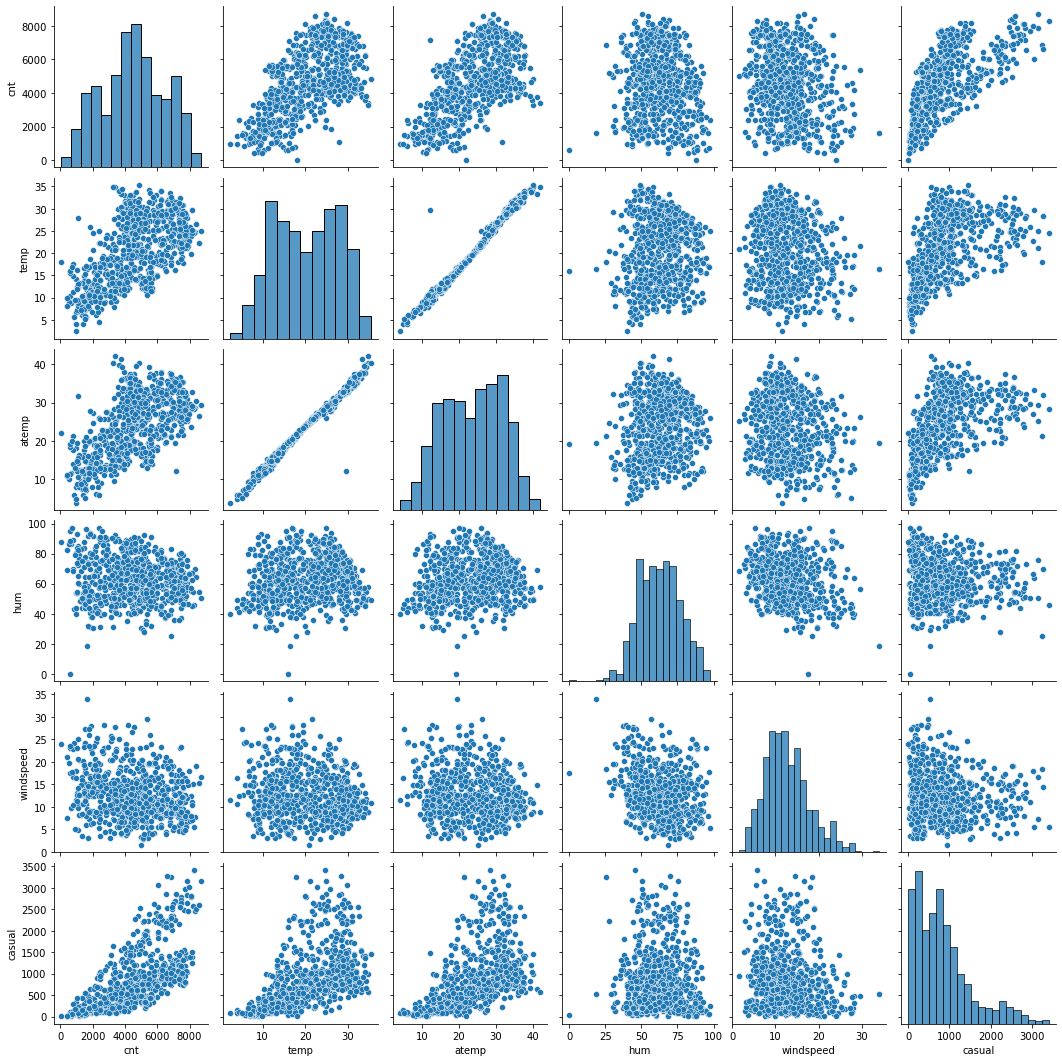

In [54]:
#Checking correlation between numeric variables
sns.pairplot(Boombike,vars=['cnt','temp','atemp','hum','windspeed','casual'])
plt.show()
#By looking at the below plot cnt and temp have high positive correlation

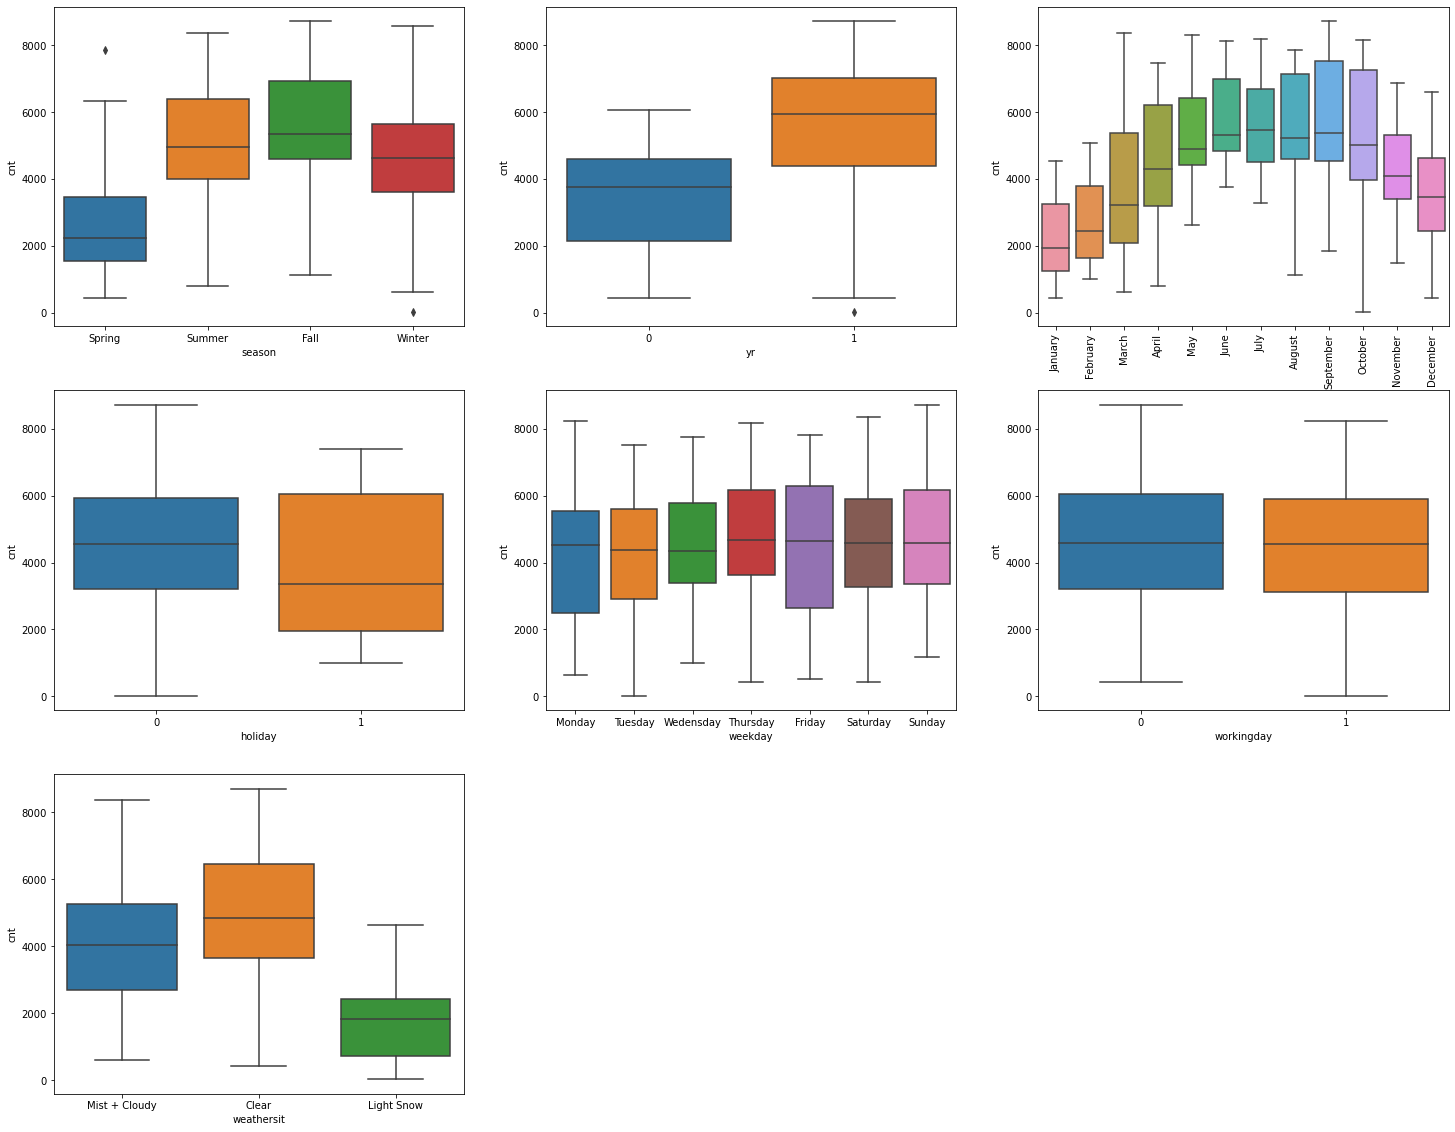

In [55]:
#CHeck for correlation in categorical vaiables
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y ='cnt', data = Boombike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y ='cnt', data = Boombike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y ='cnt', data = Boombike,)
plt.xticks(rotation = 90)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y ='cnt', data = Boombike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y ='cnt', data = Boombike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y ='cnt', data = Boombike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y ='cnt', data = Boombike)
plt.show()

In [38]:
#From above plot is observed that
#1. Count is more in Fall season
#2. Count is more in 1 i.e 2019
#3. Count is more in September month
#4. Count is slightly more on holidays
#5. Count is slightly more on Friday
#6. Count is slightly more on non working days
#7. Count is more in clear  weather

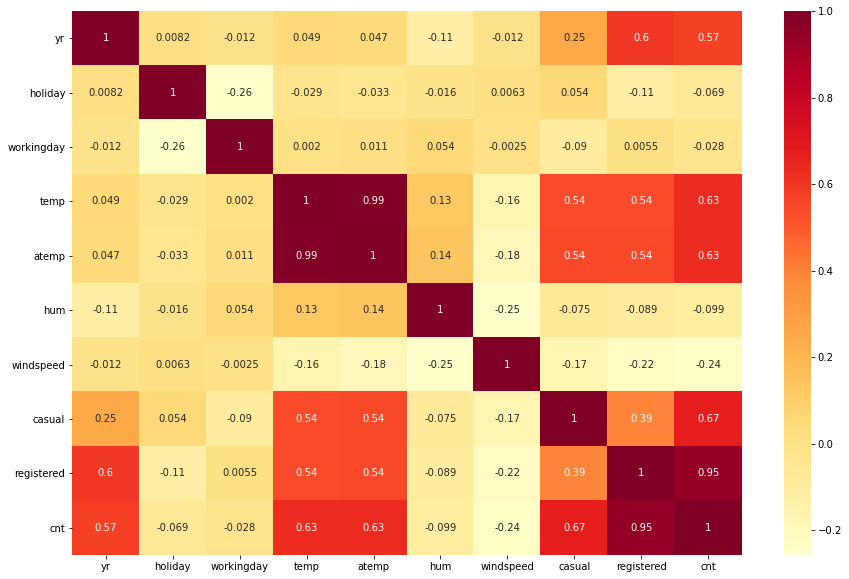

In [59]:
#Check correlation using heat map
plt.figure(figsize = (15,10))
sns.heatmap(Boombike.corr(), annot = True, cmap = 'YlOrRd')
plt.show()

In [60]:
#Create dummy variables for categorical data
#1. For mnth column
month_dummy = pd.get_dummies(Boombike['mnth'], drop_first = True)

In [61]:
#2. For Season column
season_dummy = pd.get_dummies(Boombike['season'], drop_first = True)

In [62]:
#3.For weekday column
weekday_dummy = pd.get_dummies(Boombike['weekday'], drop_first = True)

In [63]:
#4. For weathersit column
weathersit_dummy = pd.get_dummies(Boombike['weathersit'], drop_first = True)

In [64]:
#Concatinate all dummy variables to main dataset
Boombike = pd.concat([month_dummy,season_dummy,weekday_dummy,weathersit_dummy,Boombike], axis = 1)

In [65]:
Boombike.head()

,August,December,February,January,July,June,March,May,November,October,...,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,0,1,0,0,0,0,0,0,...,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,1,0,0,0,0,0,0,...,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,0,1,0,0,0,0,0,0,...,Wedensday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,0,1,0,0,0,0,0,0,...,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,0,1,0,0,0,0,0,0,...,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [66]:
# Dropping all main categorical columns
Boombike = Boombike.drop(['mnth','season','weekday','weathersit'], axis =1)

In [67]:
Boombike.head()

,August,December,February,January,July,June,March,May,November,October,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [68]:
Boombike.describe()

,August,December,February,January,July,June,March,May,November,October,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,...,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,...,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


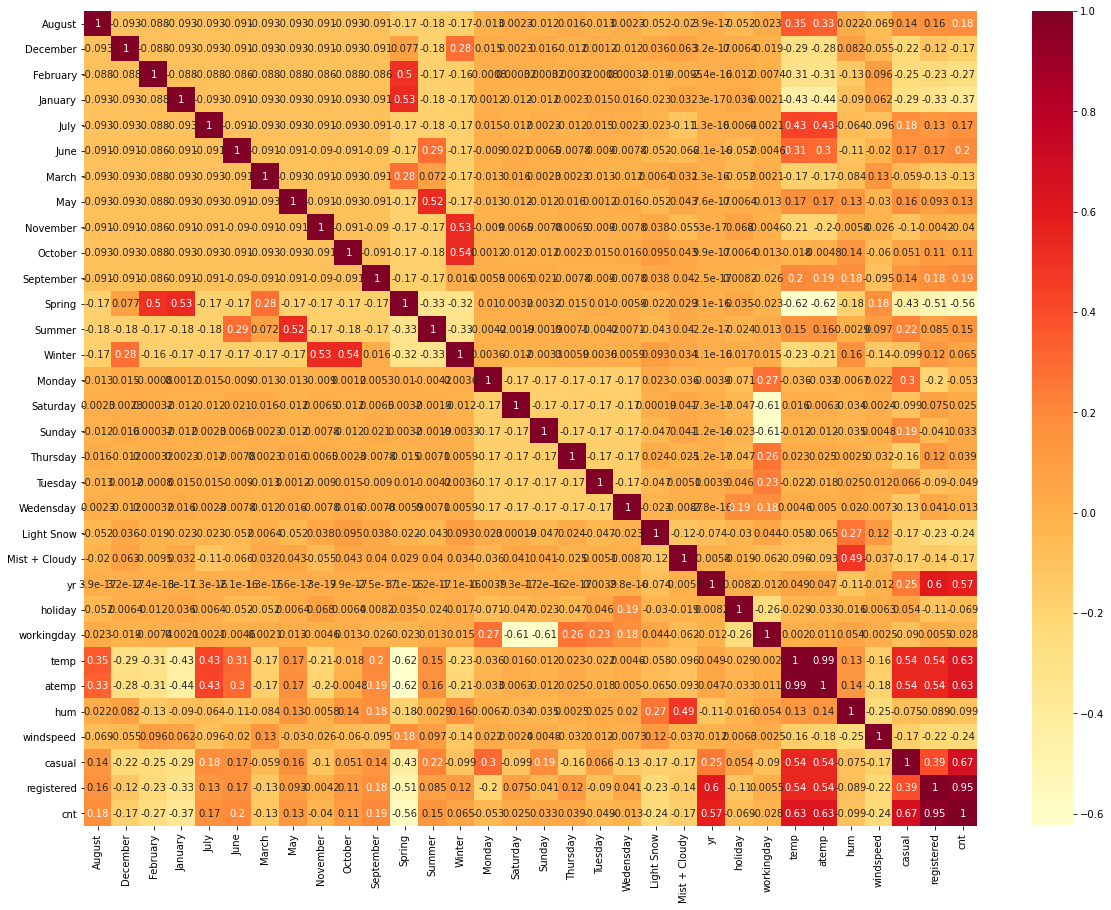

In [70]:
#CHeck for correlation using heat map
plt.figure(figsize = (20,15))
sns.heatmap(Boombike.corr(),annot = True, cmap = 'YlOrRd')
plt.show()
#from below plt we can see some positive crrelations

In [113]:
#Split data set into train test sets
b_train, b_test = train_test_split(Boombike, train_size = 0.7,test_size = 0.3, random_state = 100)

In [115]:
b_train.shape
b_test.shape

(219, 32)

In [116]:
b_train.head()

,August,December,February,January,July,June,March,May,November,October,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
653,0,0,0,0,0,0,0,0,0,1,...,1,0,1,19.201653,23.0423,55.8333,12.208807,922,6612,7534
576,0,0,0,0,1,0,0,0,0,0,...,1,0,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,16.980847,20.6746,62.1250,10.792293,956,3110,4066
728,0,1,0,0,0,0,0,0,0,0,...,1,0,1,10.489153,11.5850,48.3333,23.500518,364,1432,1796
482,0,0,0,0,0,0,0,0,0,0,...,1,0,0,15.443347,18.8752,48.9583,8.708325,1120,3100,4220


In [117]:
#Rescaling of train data set
#using normalization
scaler = MinMaxScaler()

In [118]:
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

In [119]:
b_train[num_vars] = scaler.fit_transform(b_train[num_vars])

In [120]:
b_train.head()

,August,December,February,January,July,June,March,May,November,October,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
653,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973


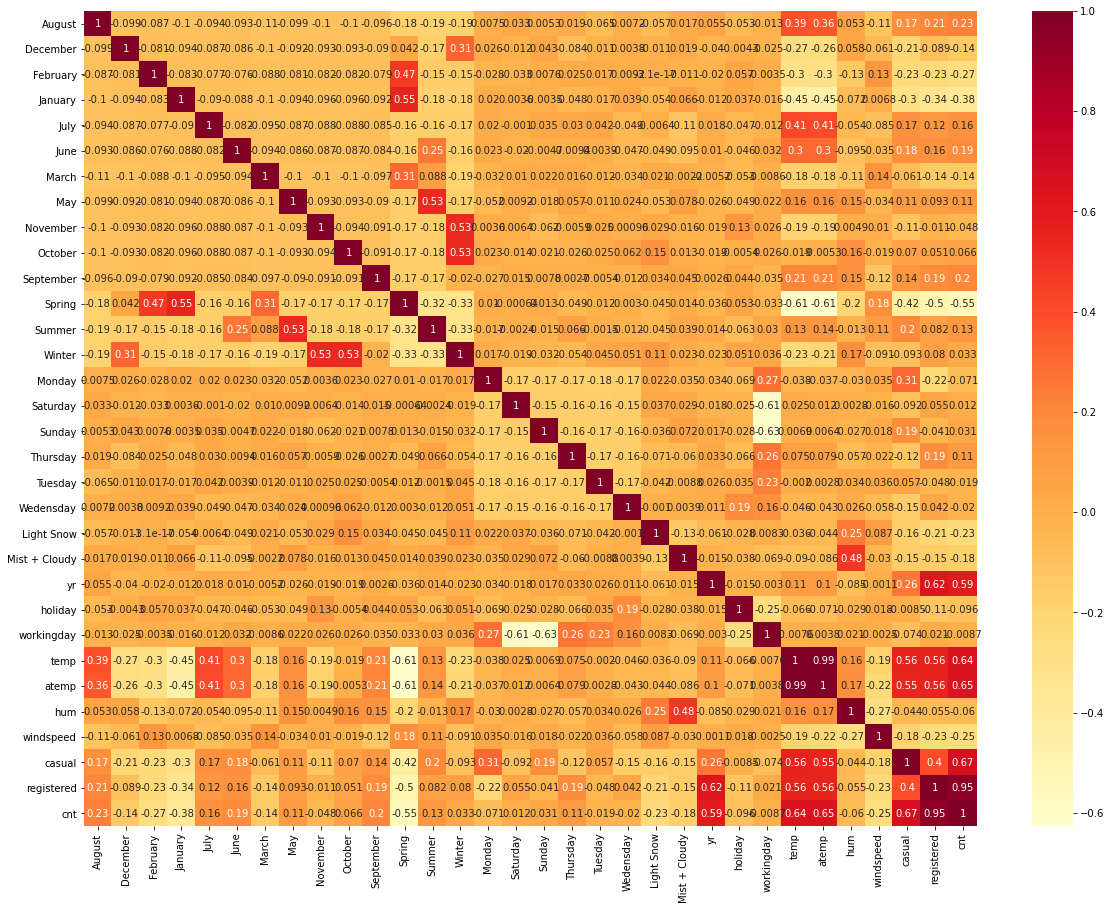

In [121]:
#check for correlations in train data set using heatmap
plt.figure(figsize = (20,15))
sns.heatmap(b_train.corr(),annot = True, cmap = 'YlOrRd')
plt.show()

In [122]:
#Create x_train and y_train data sets
#as targer variable is cnt
y_train = b_train.pop('cnt')
X_train = b_train

In [123]:
X_train.head()

,August,December,February,January,July,June,March,May,November,October,...,Mist + Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered
653,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776
576,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220
426,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145
728,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869
482,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701


In [124]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [125]:
#Building the model
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)

In [126]:
lr_model = lr.fit()

In [127]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.276e+29
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:57:30   Log-Likelihood:                 16431.
No. Observations:                 510   AIC:                        -3.280e+04
Df Residuals:                     478   BIC:                        -3.266e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.166e-15   2.49e-15      0.469      0.639   -3.72e-15    6.05e-15
August          2.29e-16   9.81e-16      0.233      0.816    -1.7e-15    2.16e-15
December       6.436e-16    9.7e-16      0.664      0.507   -1.26e-15    2.55e-15
February       5.343e-16   9.52e-16      0.562      0.575   -1.34e-15     2.4e-15
January        6.557e-16    9.7e-16      0.676      0.499   -1.25e-15    2.56e-15
July          -1.249e-16   1.02e-15     -0.123      0.902   -2.12e-15    1.87e-15
June           3.469e-16   7.32e-16      0.474      0.636   -1.09e-15    1.79e-15
March          6.835e-16   7.07e-16      0.966      0.334   -7.06e-16    2.07e-15
May            3.331e-16   6.11e-16      0.545      0.586   -8.68e-16    1.53e-15
November       1.096e-15   1.05e-15      1.045      0.297   -9.66e-16    3.16e-15
October        5.863e-16   1.03e-15      0.567      0.571   -1.45e-15    2.62e-15
September      1.804e-16   9.31e-16      0.194      0.846   -1.65e-15    2.01e-15
Spring                 0   8.68e-16          0      1.000    -1.7e-15     1.7e-15
Summer         4.163e-16   7.61e-16      0.547      0.584   -1.08e-15    1.91e-15
Winter        -2.359e-16   8.21e-16     -0.287      0.774   -1.85e-15    1.38e-15
Monday        -6.939e-18   5.08e-16     -0.014      0.989      -1e-15     9.9e-16
Saturday      -5.967e-16   2.05e-15     -0.292      0.771   -4.62e-15    3.42e-15
Sunday        -5.274e-16   2.05e-15     -0.258      0.797   -4.55e-15    3.49e-15
Thursday      -2.082e-17   4.28e-16     -0.049      0.961   -8.62e-16     8.2e-16
Tuesday       -9.021e-17   4.41e-16     -0.204      0.838   -9.57e-16    7.77e-16
Wedensday      2.637e-16   4.36e-16      0.604      0.546   -5.94e-16    1.12e-15
Light Snow    -5.551e-17   8.29e-16     -0.067      0.947   -1.68e-15    1.57e-15
Mist + Cloudy -2.602e-17   3.11e-16     -0.084      0.933   -6.36e-16    5.84e-16
yr             4.909e-16   3.94e-16      1.247      0.213   -2.82e-16    1.26e-15
holiday       -3.469e-16   1.88e-15     -0.185      0.853   -4.03e-15    3.34e-15
workingday    -3.886e-16   2.03e-15     -0.191      0.848   -4.38e-15     3.6e-15
temp           8.882e-16   4.14e-15      0.214      0.830   -7.25e-15    9.03e-15
atemp          4.441e-16   3.98e-15      0.112      0.911   -7.38e-15    8.27e-15
hum            2.776e-17   1.13e-15      0.025      0.980   -2.19e-15    2.25e-15
windspeed       1.11e-16   7.99e-16      0.139      0.890   -1.46e-15    1.68e-15
casual            0.3775   9.38e-16   4.03e+14      0.000       0.377       0.377
registered        0.7968   1.23e-15    6.5e+14      0.000       0.797       0.797
==============================================================================
Omnibus:                       15.667   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB

In [128]:
#Droppig casual and registered from set
X_train = X_train.drop(['casual','registered'],axis = 1)

In [129]:
X_train_sm = X_train

In [130]:
X_train_sm = sm.add_constant(X_train_sm)

In [131]:
lr = sm.OLS(y_train,X_train_sm)

In [132]:
lr_model = lr.fit()

In [133]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.09e-178
Time:                        18:57:30   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3948      0.085      4.638      0.000       0.228       0.562
August            0.0230      0.034      0.671      0.503      -0.044       0.091
December         -0.0457      0.034     -1.347      0.178      -0.112       0.021
February         -0.0372      0.033     -1.117      0.265      -0.103       0.028
January          -0.0635      0.034     -1.873      0.062      -0.130       0.003
July             -0.0339      0.036     -0.953      0.341      -0.104       0.036
June              0.0021      0.026      0.084      0.933      -0.048       0.052
March             0.0008      0.025      0.032      0.974      -0.048       0.050
May               0.0248      0.021      1.161      0.246      -0.017       0.067
November         -0.0415      0.037     -1.131      0.259      -0.114       0.031
October           0.0059      0.036      0.164      0.870      -0.065       0.077
September         0.0867      0.032      2.680      0.008       0.023       0.150
Spring           -0.0441      0.030     -1.455      0.146      -0.104       0.015
Summer            0.0418      0.027      1.575      0.116      -0.010       0.094
Winter            0.1105      0.028      3.915      0.000       0.055       0.166
Monday           -0.0247      0.015     -1.691      0.091      -0.053       0.004
Saturday         -0.0563      0.072     -0.786      0.432      -0.197       0.084
Sunday           -0.0503      0.072     -0.703      0.482      -0.191       0.090
Thursday          0.0038      0.015      0.257      0.798      -0.026       0.033
Tuesday          -0.0263      0.015     -1.794      0.074      -0.055       0.003
Wedensday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
Light Snow       -0.2509      0.027     -9.402      0.000      -0.303      -0.198
Mist + Cloudy    -0.0593      0.011     -5.627      0.000      -0.080      -0.039
yr                0.2309      0.008     28.359      0.000       0.215       0.247
holiday          -0.1352      0.065     -2.068      0.039      -0.264      -0.007
workingday       -0.0609      0.071     -0.856      0.392      -0.201       0.079
temp              0.4003      0.143      2.790      0.005       0.118       0.682
atemp             0.0464      0.139      0.333      0.739      -0.227       0.320
hum              -0.1578      0.039     -4.054      0.000      -0.234      -0.081
windspeed        -0.1811      0.027     -6.793      0.000      -0.234      -0.129
==============================================================================
Omnibus:                       79.473   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.099
Skew:                          -0.773   Prob(JB):                     1.45e-46
Kurtosis:                       5.747   Cond. No.            

In [134]:
#Check for VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
25,temp,442.82
26,atemp,382.51
24,workingday,63.90
27,hum,41.21
11,Spring,13.56
13,Winter,12.53
16,Sunday,12.35
15,Saturday,11.84
12,Summer,9.87
8,November,7.16


In [135]:
#Drop columns with high P-Values
X_train = X_train.drop('March',axis = 1)

In [136]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.06
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.10e-179
Time:                        18:57:30   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     481   BIC:                            -866.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3953      0.084      4.728      0.000       0.231       0.560
August            0.0227      0.032      0.700      0.484      -0.041       0.086
December         -0.0464      0.026     -1.768      0.078      -0.098       0.005
February         -0.0380      0.022     -1.689      0.092      -0.082       0.006
January          -0.0643      0.023     -2.851      0.005      -0.109      -0.020
July             -0.0343      0.034     -1.010      0.313      -0.101       0.032
June              0.0019      0.024      0.078      0.938      -0.046       0.050
May               0.0245      0.020      1.229      0.220      -0.015       0.064
November         -0.0422      0.031     -1.357      0.176      -0.103       0.019
October           0.0053      0.031      0.172      0.864      -0.055       0.066
September         0.0863      0.029      2.936      0.003       0.029       0.144
Spring           -0.0438      0.029     -1.527      0.127      -0.100       0.013
Summer            0.0416      0.026      1.600      0.110      -0.009       0.093
Winter            0.1107      0.028      3.995      0.000       0.056       0.165
Monday           -0.0247      0.015     -1.696      0.090      -0.053       0.004
Saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
Sunday           -0.0503      0.071     -0.703      0.482      -0.191       0.090
Thursday          0.0038      0.015      0.257      0.797      -0.026       0.033
Tuesday          -0.0264      0.015     -1.797      0.073      -0.055       0.002
Wedensday        -0.0113      0.015     -0.737      0.461      -0.041       0.019
Light Snow       -0.2509      0.027     -9.412      0.000      -0.303      -0.199
Mist + Cloudy    -0.0593      0.011     -5.634      0.000      -0.080      -0.039
yr                0.2309      0.008     28.388      0.000       0.215       0.247
holiday          -0.1352      0.065     -2.070      0.039      -0.264      -0.007
workingday       -0.0609      0.071     -0.857      0.392      -0.200       0.079
temp              0.4001      0.143      2.793      0.005       0.119       0.682
atemp             0.0463      0.139      0.333      0.739      -0.227       0.320
hum              -0.1577      0.039     -4.069      0.000      -0.234      -0.082
windspeed        -0.1812      0.027     -6.811      0.000      -0.233      -0.129
==============================================================================
Omnibus:                       79.453   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.191
Skew:                          -0.772   Prob(JB):                     1.38e-46
Kurtosis:                       5.748   Cond. No.                         92.4
================================================================

In [137]:
#Check for VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
24,temp,442.73
25,atemp,382.26
23,workingday,57.65
26,hum,40.60
12,Winter,11.97
10,Spring,11.61
15,Sunday,11.11
14,Saturday,10.73
11,Summer,9.68
0,August,6.33


In [138]:
#Dropping columns with high VIF
X_train = X_train.drop(['temp','atemp','workingday','hum'], axis =1)

In [139]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     92.59
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.15e-164
Time:                        18:57:30   Log-Likelihood:                 477.00
No. Observations:                 510   AIC:                            -904.0
Df Residuals:                     485   BIC:                            -798.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4779      0.033     14.647      0.000       0.414       0.542
August            0.1281      0.032      3.943      0.000       0.064       0.192
December         -0.1063      0.028     -3.831      0.000      -0.161      -0.052
February         -0.0957      0.024     -4.053      0.000      -0.142      -0.049
January          -0.1569      0.022     -7.046      0.000      -0.201      -0.113
July              0.1012      0.033      3.044      0.002       0.036       0.167
June              0.1230      0.022      5.551      0.000       0.079       0.167
May               0.0918      0.020      4.661      0.000       0.053       0.130
November         -0.0825      0.034     -2.457      0.014      -0.149      -0.017
October           0.0197      0.033      0.589      0.556      -0.046       0.085
September         0.1479      0.031      4.801      0.000       0.087       0.208
Spring           -0.0958      0.031     -3.117      0.002      -0.156      -0.035
Summer            0.0095      0.028      0.337      0.736      -0.046       0.065
Winter            0.0769      0.030      2.565      0.011       0.018       0.136
Monday           -0.0328      0.016     -2.067      0.039      -0.064      -0.002
Saturday          0.0062      0.017      0.377      0.706      -0.026       0.039
Sunday            0.0090      0.016      0.550      0.582      -0.023       0.041
Thursday          0.0060      0.016      0.366      0.715      -0.026       0.038
Tuesday          -0.0304      0.016     -1.899      0.058      -0.062       0.001
Wedensday        -0.0155      0.017     -0.930      0.353      -0.048       0.017
Light Snow       -0.3018      0.027    -11.336      0.000      -0.354      -0.249
Mist + Cloudy    -0.0876      0.009     -9.321      0.000      -0.106      -0.069
yr                0.2461      0.009     28.287      0.000       0.229       0.263
holiday          -0.0668      0.029     -2.338      0.020      -0.123      -0.011
windspeed        -0.1623      0.027     -5.961      0.000      -0.216      -0.109
==============================================================================
Omnibus:                       79.432   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.313
Skew:                          -0.708   Prob(JB):                     2.20e-56
Kurtosis:                       6.171   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
#Check for VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
12,Winter,9.75
10,Spring,5.59
23,windspeed,4.82
7,November,4.43
8,October,4.43
11,Summer,4.16
1,December,2.98
3,January,2.30
21,yr,2.03
13,Monday,2.01


In [141]:
#Dropping columns with high p-values
X_train = X_train.drop(['Tuesday','Saturday'], axis =1)

In [142]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 10 May 2022   Prob (F-statistic):          9.17e-165
Time:                        18:57:30   Log-Likelihood:                 473.94
No. Observations:                 510   AIC:                            -901.9
Df Residuals:                     487   BIC:                            -804.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4701      0.032     14.825      0.000       0.408       0.532
August            0.1297      0.033      3.980      0.000       0.066       0.194
December         -0.1041      0.028     -3.739      0.000      -0.159      -0.049
February         -0.0975      0.024     -4.113      0.000      -0.144      -0.051
January          -0.1571      0.022     -7.027      0.000      -0.201      -0.113
July              0.0988      0.033      2.964      0.003       0.033       0.164
June              0.1233      0.022      5.542      0.000       0.080       0.167
May               0.0923      0.020      4.670      0.000       0.053       0.131
November         -0.0795      0.034     -2.359      0.019      -0.146      -0.013
October           0.0208      0.034      0.621      0.535      -0.045       0.087
September         0.1486      0.031      4.807      0.000       0.088       0.209
Spring           -0.0952      0.031     -3.088      0.002      -0.156      -0.035
Summer            0.0088      0.028      0.313      0.754      -0.047       0.064
Winter            0.0734      0.030      2.443      0.015       0.014       0.132
Monday           -0.0238      0.013     -1.843      0.066      -0.049       0.002
Sunday            0.0181      0.014      1.340      0.181      -0.008       0.045
Thursday          0.0152      0.013      1.135      0.257      -0.011       0.042
Wedensday        -0.0062      0.014     -0.447      0.655      -0.033       0.021
Light Snow       -0.2961      0.027    -11.134      0.000      -0.348      -0.244
Mist + Cloudy    -0.0871      0.009     -9.230      0.000      -0.106      -0.069
yr                0.2454      0.009     28.114      0.000       0.228       0.263
holiday          -0.0700      0.029     -2.444      0.015      -0.126      -0.014
windspeed        -0.1649      0.027     -6.036      0.000      -0.219      -0.111
==============================================================================
Omnibus:                       80.001   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.436
Skew:                          -0.708   Prob(JB):                     1.03e-57
Kurtosis:                       6.216   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
#Check for VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
12,Winter,9.44
10,Spring,5.04
21,windspeed,4.77
7,November,4.38
8,October,4.36
11,Summer,3.54
1,December,2.96
3,January,2.29
19,yr,2.02
2,February,1.97


In [144]:
#Dropping columns with high p-values
X_train = X_train.drop(['Summer','Wedensday','October',], axis =1)

In [145]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     116.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.02e-167
Time:                        18:57:31   Log-Likelihood:                 473.63
No. Observations:                 510   AIC:                            -907.3
Df Residuals:                     490   BIC:                            -822.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4780      0.018     26.683      0.000       0.443       0.513
August            0.1201      0.019      6.345      0.000       0.083       0.157
December         -0.1168      0.019     -6.288      0.000      -0.153      -0.080
February         -0.1015      0.023     -4.442      0.000      -0.146      -0.057
January          -0.1612      0.021     -7.511      0.000      -0.203      -0.119
July              0.0895      0.020      4.416      0.000       0.050       0.129
June              0.1196      0.020      5.892      0.000       0.080       0.160
May               0.0914      0.019      4.690      0.000       0.053       0.130
November         -0.0959      0.020     -4.855      0.000      -0.135      -0.057
September         0.1377      0.019      7.357      0.000       0.101       0.174
Spring           -0.1009      0.020     -5.161      0.000      -0.139      -0.062
Winter            0.0803      0.017      4.743      0.000       0.047       0.114
Monday           -0.0220      0.012     -1.763      0.078      -0.047       0.003
Sunday            0.0194      0.013      1.482      0.139      -0.006       0.045
Thursday          0.0166      0.013      1.276      0.203      -0.009       0.042
Light Snow       -0.2949      0.026    -11.157      0.000      -0.347      -0.243
Mist + Cloudy    -0.0869      0.009     -9.240      0.000      -0.105      -0.068
yr                0.2451      0.009     28.186      0.000       0.228       0.262
holiday          -0.0708      0.028     -2.519      0.012      -0.126      -0.016
windspeed        -0.1640      0.027     -6.036      0.000      -0.217      -0.111
==============================================================================
Omnibus:                       77.797   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.412
Skew:                          -0.691   Prob(JB):                     1.55e-55
Kurtosis:                       6.157   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
#Check for VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
9,Spring,4.10
18,windspeed,3.35
10,Winter,2.79
3,January,2.17
16,yr,1.91
2,February,1.87
7,November,1.80
15,Mist + Cloudy,1.55
1,December,1.54
11,Monday,1.27


In [147]:
#Dropping columns with high p-values
X_train = X_train.drop(['Sunday','Thursday'], axis =1)

In [148]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     129.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.80e-169
Time:                        18:57:31   Log-Likelihood:                 471.97
No. Observations:                 510   AIC:                            -907.9
Df Residuals:                     492   BIC:                            -831.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4845      0.018     27.680      0.000       0.450       0.519
August            0.1197      0.019      6.317      0.000       0.082       0.157
December         -0.1169      0.019     -6.295      0.000      -0.153      -0.080
February         -0.1004      0.023     -4.392      0.000      -0.145      -0.055
January          -0.1616      0.021     -7.520      0.000      -0.204      -0.119
July              0.0902      0.020      4.451      0.000       0.050       0.130
June              0.1186      0.020      5.840      0.000       0.079       0.158
May               0.0908      0.020      4.656      0.000       0.052       0.129
November         -0.0966      0.020     -4.888      0.000      -0.135      -0.058
September         0.1374      0.019      7.338      0.000       0.101       0.174
Spring           -0.1021      0.020     -5.223      0.000      -0.141      -0.064
Winter            0.0793      0.017      4.678      0.000       0.046       0.113
Monday           -0.0280      0.012     -2.328      0.020      -0.052      -0.004
Light Snow       -0.2986      0.026    -11.328      0.000      -0.350      -0.247
Mist + Cloudy    -0.0869      0.009     -9.272      0.000      -0.105      -0.068
yr                0.2454      0.009     28.193      0.000       0.228       0.262
holiday          -0.0752      0.028     -2.685      0.008      -0.130      -0.020
windspeed        -0.1632      0.027     -6.003      0.000      -0.217      -0.110
==============================================================================
Omnibus:                       76.861   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.115
Skew:                          -0.673   Prob(JB):                     1.47e-56
Kurtosis:                       6.208   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
#Check for VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
9,Spring,4.08
16,windspeed,3.24
10,Winter,2.76
3,January,2.17
14,yr,1.90
2,February,1.86
7,November,1.80
1,December,1.54
13,Mist + Cloudy,1.53
0,August,1.25


In [150]:
#The above model is final model

In [154]:
#Residual analysis
y_train_pred = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

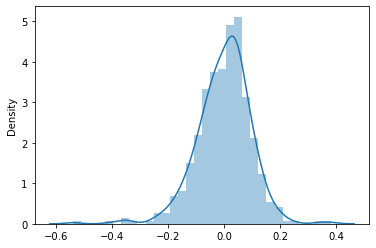

In [155]:
res = y_train-y_train_pred
sns.distplot(res)
#as error is normally distributed model fit correcly

In [156]:
#evaluate model using test data set
b_test.shape

(219, 32)

In [157]:
X_train.shape

(510, 17)

In [159]:
#Rescaling the test data set
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']
b_test[num_vars] = scaler.transform(b_test[num_vars])

In [160]:
b_test.head()

,August,December,February,January,July,June,March,May,November,October,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029


In [161]:
b_test.describe()

,August,December,February,January,July,June,March,May,November,October,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300


In [162]:
#dividing test data sets into X_test adn y_test
y_test = b_test.pop('cnt')
X_test = b_test

In [163]:
#make predictions using model
X_test = X_test[X_train.columns]

In [164]:
X_test_sm = sm.add_constant(X_test)

In [165]:
y_test_pred = lr_model.predict(X_test_sm)

In [170]:
#Find r2 score for test set
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_train = r2_score(y_true = y_train, y_pred = y_train_pred)

In [172]:
print('r2 score for train:',r2_train)
print('r2 score for test:',r2_test)

r2 score for train: 0.8172892590591245
r2 score for test: 0.7980828858362644
